# Probability

In [4]:
import enum, random

In [5]:
# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

In [6]:
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [7]:
both_girls = 0
older_girl = 0
either_girl = 0

In [8]:
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == Kid.GIRL:
        older_girl += 1
        
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
        
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [10]:
print(older_girl)
print(both_girls)
print(either_girl)

4937
2472
7464


In [9]:
print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3
    
assert 0.48 < both_girls / older_girl < 0.52
assert 0.30 < both_girls / either_girl < 0.35

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## Probability Density Function (PDF) for a uniform distribution

In [11]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [13]:
uniform_pdf(0.34)

1

## Cumulative Distribution Function (CDF) for a uniform distribution

In [14]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

In [15]:
uniform_cdf(0.34)

0.34

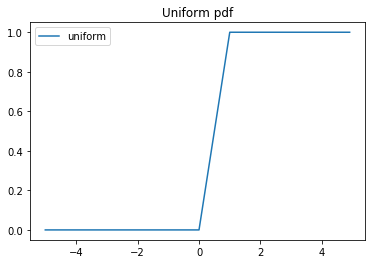

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = [x / 10 for x in range(-50, 50)]

plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label='uniform')
plt.legend()
plt.title("Uniform pdf")
plt.savefig('images/uniform_pdf.png')
plt.show()

## PDF for a normal distribution

<img src="images/normal_pdf.png" alt="Dot product" style="width: 600px;"/>

In [16]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

In [22]:
xs = [x / 10 for x in range(-50, 50)]
xs

[-5.0,
 -4.9,
 -4.8,
 -4.7,
 -4.6,
 -4.5,
 -4.4,
 -4.3,
 -4.2,
 -4.1,
 -4.0,
 -3.9,
 -3.8,
 -3.7,
 -3.6,
 -3.5,
 -3.4,
 -3.3,
 -3.2,
 -3.1,
 -3.0,
 -2.9,
 -2.8,
 -2.7,
 -2.6,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.1,
 -2.0,
 -1.9,
 -1.8,
 -1.7,
 -1.6,
 -1.5,
 -1.4,
 -1.3,
 -1.2,
 -1.1,
 -1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9]

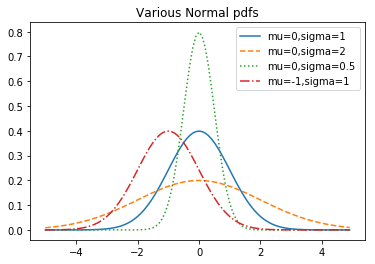

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.savefig('images/various_normal_pdfs.png')
plt.show()